In [1]:
### Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

df = pd.read_csv(r"D:\Centurion University\5th Semester\ML for Predictive Analysis\Heart_Disease_Prediction.csv")
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [2]:
# how many columns and rows in dataframe
df.shape

(270, 14)

In [3]:
# quick view of columns and values
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
# are there any missing values?
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
# are there duplicate values?
format(len(df[df.duplicated()]))

'0'

In [6]:
### Seperating the numeric variable and categorical variable
name = df.columns
num_var = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease']
cat_var = [item for item in name if item not in num_var]

num_var_data = df[df.columns & num_var]
num_var_data.describe()

,Age,BP,Cholesterol,Max HR
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778
std,9.109067,17.861608,51.686237,23.165717
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,213.000000,133.000000
50%,55.000000,130.000000,245.000000,153.500000
75%,61.000000,140.000000,280.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [7]:
num_var_data.corr()

,Age,BP,Cholesterol,Max HR
Age,1.000000,0.273053,0.220056,-0.402215
BP,0.273053,1.000000,0.173019,-0.039136
Cholesterol,0.220056,0.173019,1.000000,-0.018739
Max HR,-0.402215,-0.039136,-0.018739,1.000000


<AxesSubplot:>

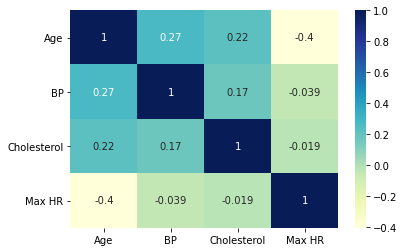

In [8]:
sns.heatmap(num_var_data.corr(), cmap="YlGnBu", annot=True)

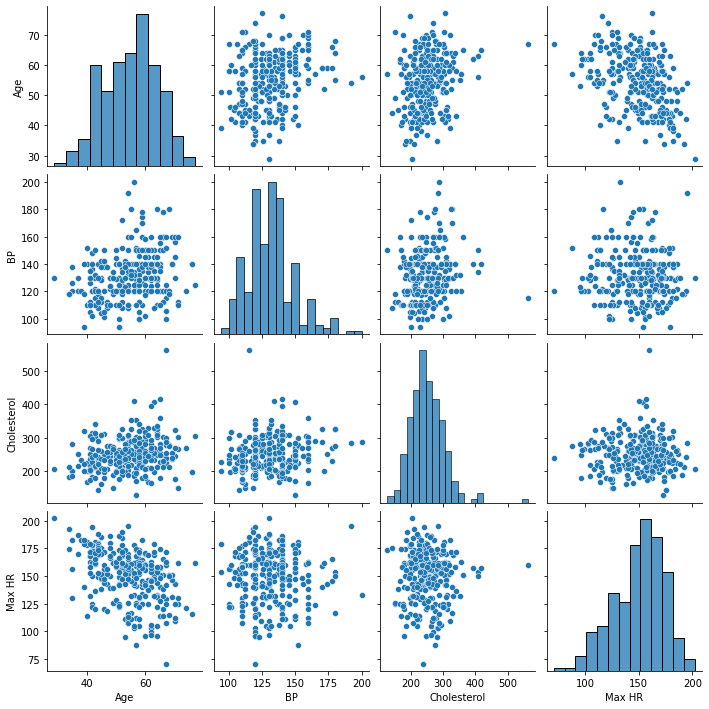

In [9]:
sns.pairplot(num_var_data)

In [10]:
num_var_data[num_var_data['Cholesterol'] > 500]

,Age,BP,Cholesterol,Max HR,Heart Disease
1,67,115,564,160,Absence


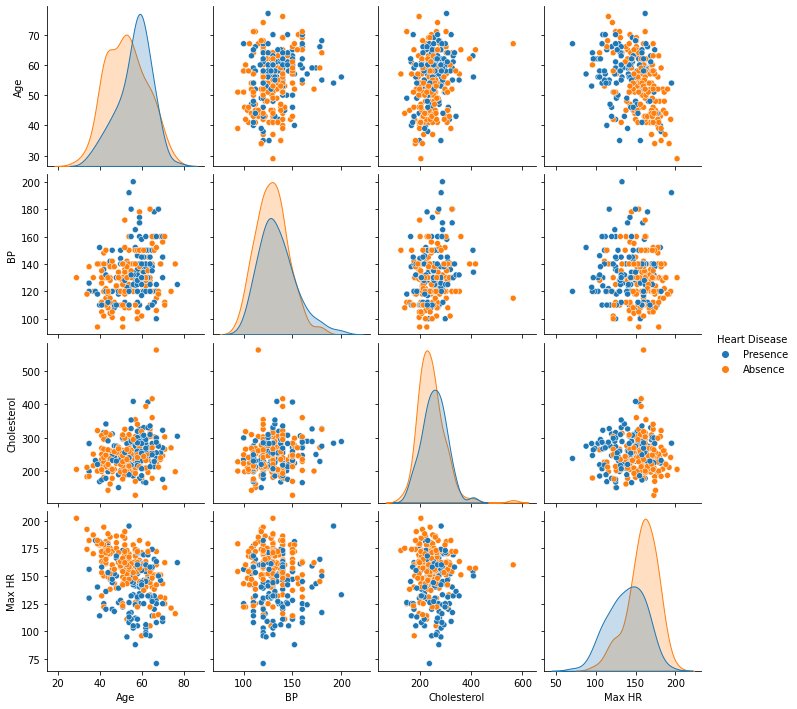

In [11]:
sns.pairplot(num_var_data, hue = 'Heart Disease')

In [12]:
### Segregrating dataframe in independent and target variable
x = df.drop(['Heart Disease'], axis = 1)  #Independent Variables
y = df['Heart Disease']                   #Target Variables

In [13]:
### Logistic regression with train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8555555555555555


C:\Habib Python\python_new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
### Label encoding the target variable

from sklearn.preprocessing import LabelEncoder
x_train_enc = X_train

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)

In [15]:
### Feature Importance using permutation method

from sklearn.inspection import permutation_importance

### perform permutation importance
model.fit(x_train_enc, y_train_enc)

results = permutation_importance(model, x_train_enc, y_train_enc, scoring='neg_mean_squared_error')

#### get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Habib Python\python_new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: 0.01944
Feature: 1, Score: 0.01574
Feature: 2, Score: 0.01667
Feature: 3, Score: 0.00093
Feature: 4, Score: -0.00278
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00370
Feature: 7, Score: 0.04444
Feature: 8, Score: 0.01852
Feature: 9, Score: 0.00370
Feature: 10, Score: 0.00278
Feature: 11, Score: 0.07407
Feature: 12, Score: 0.02778


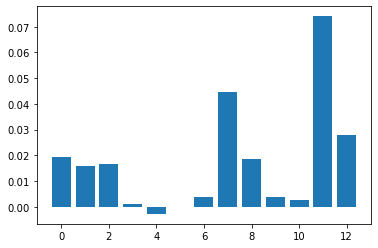

In [16]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [18]:
selected_feature = ['Sex','Max HR', 'Number of vessels fluro', 'Thallium']
print(selected_feature)

['Sex', 'Max HR', 'Number of vessels fluro', 'Thallium']


In [19]:
data = df[df.columns & selected_feature]

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33)
model = LogisticRegression()
model.fit(X_train, y_train)
r_sq = model.score(data, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8222222222222222


In [20]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [21]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796296 (0.053029)
LDA: 0.800000 (0.052899)
KNN: 0.748148 (0.077336)
CART: 0.677778 (0.066357)
NB: 0.788889 (0.062085)
SVM: 0.696296 (0.054433)


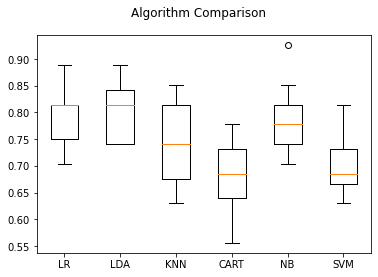

In [22]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()